In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (Google Colab에서 한글 표시용)
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_style("whitegrid")

print("=== 계층적 클러스터링 분석 시작 ===\n")

# 1. 데이터 로드
try:
    # Google Colab에서 파일을 업로드한 경우
    df = pd.read_csv('/content/final_dataset_integrated_features.csv', encoding = 'utf-8')
    print("✅ 데이터 로드 성공!")
except:
    print("❌ Error - No data found")
    exit()

# 중구 데이터 삭제
df.drop(index=23, inplace=True)

# 범죄밀도 데이터는 클러스터링에서 사용하지 않음
df.drop('Crime_Density', axis=1, inplace=True)

print(f"데이터 크기: {df.shape}")
print(f"컬럼명: {list(df.columns)}")
print("\n=== 데이터 미리보기 ===")
print(df.head(25))

=== 계층적 클러스터링 분석 시작 ===

✅ 데이터 로드 성공!
데이터 크기: (24, 6)
컬럼명: ['District', 'PopDensity_12_18`', 'GVA', 'Family_Happiness_Index', 'Pub_Density', 'Avg_Lux']

=== 데이터 미리보기 ===
        District  PopDensity_12_18`       GVA  Family_Happiness_Index  \
0        Gangnam        8248.490223  70453710                    6.94   
1       Gangdong        4980.691170   8546013                    7.13   
2        Gangbuk        2961.868299   3147933                    6.90   
3        Gangseo        3664.075486  17025623                    6.45   
4         Gwanak        4520.002598   5893427                    6.70   
5       Gwangjin        6354.047956   6027026                    6.55   
6           Guro        5455.625447  13424370                    6.55   
7      Geumcheon        5829.893745  16353849                    6.43   
8          Nowon        3476.304711   6203918                    7.21   
9         Dobong        3003.888218   3213654                    6.87   
10    Dongdaemun        733

In [3]:
"""**2. 데이터 전처리**"""

# 2. 데이터 전처리
print("\n=== 데이터 전처리 ===")

# 숫자가 아닌 값들을 숫자로 변환 (쉼표 제거 등)
for col in df.columns:
    if col != df.columns[0]:  # 첫 번째 컬럼(지역명)은 제외
        if df[col].dtype == 'object':
            # 쉼표 제거하고 숫자로 변환
            df[col] = df[col].astype(str).str.replace(',', '').astype(float)

# 결측값 확인
print("결측값 확인:")
print(df.isnull().sum())

# 결측값이 있다면 평균값으로 대체
if df.isnull().sum().sum() > 0:
    df.fillna(df.mean(), inplace=True)

"""**3. 클러스터링 설정**"""

# 3. 클러스터링에 사용할 특성 선택
print("\n=== 클러스터링 특성 선택 ===")

# 첫 번째 컬럼(지역명)을 제외한 모든 숫자 컬럼 사용
region_col = df.columns[0]
feature_cols = [col for col in df.columns if col != region_col and df[col].dtype in ['int64', 'float64']]

print(f"사용할 특성들: {feature_cols}")
print(f"총 특성 개수: {len(feature_cols)}")

# 특성 데이터 추출
X = df[feature_cols].values
region_names = df[region_col].values


=== 데이터 전처리 ===
결측값 확인:
District                  0
PopDensity_12_18`         0
GVA                       0
Family_Happiness_Index    0
Pub_Density               0
Avg_Lux                   0
dtype: int64

=== 클러스터링 특성 선택 ===
사용할 특성들: ['PopDensity_12_18`', 'GVA', 'Family_Happiness_Index', 'Pub_Density', 'Avg_Lux']
총 특성 개수: 5



=== 데이터 표준화 ===
표준화 완료!
표준화된 데이터 형태: (24, 5)

=== 계층적 클러스터링 진행 ===


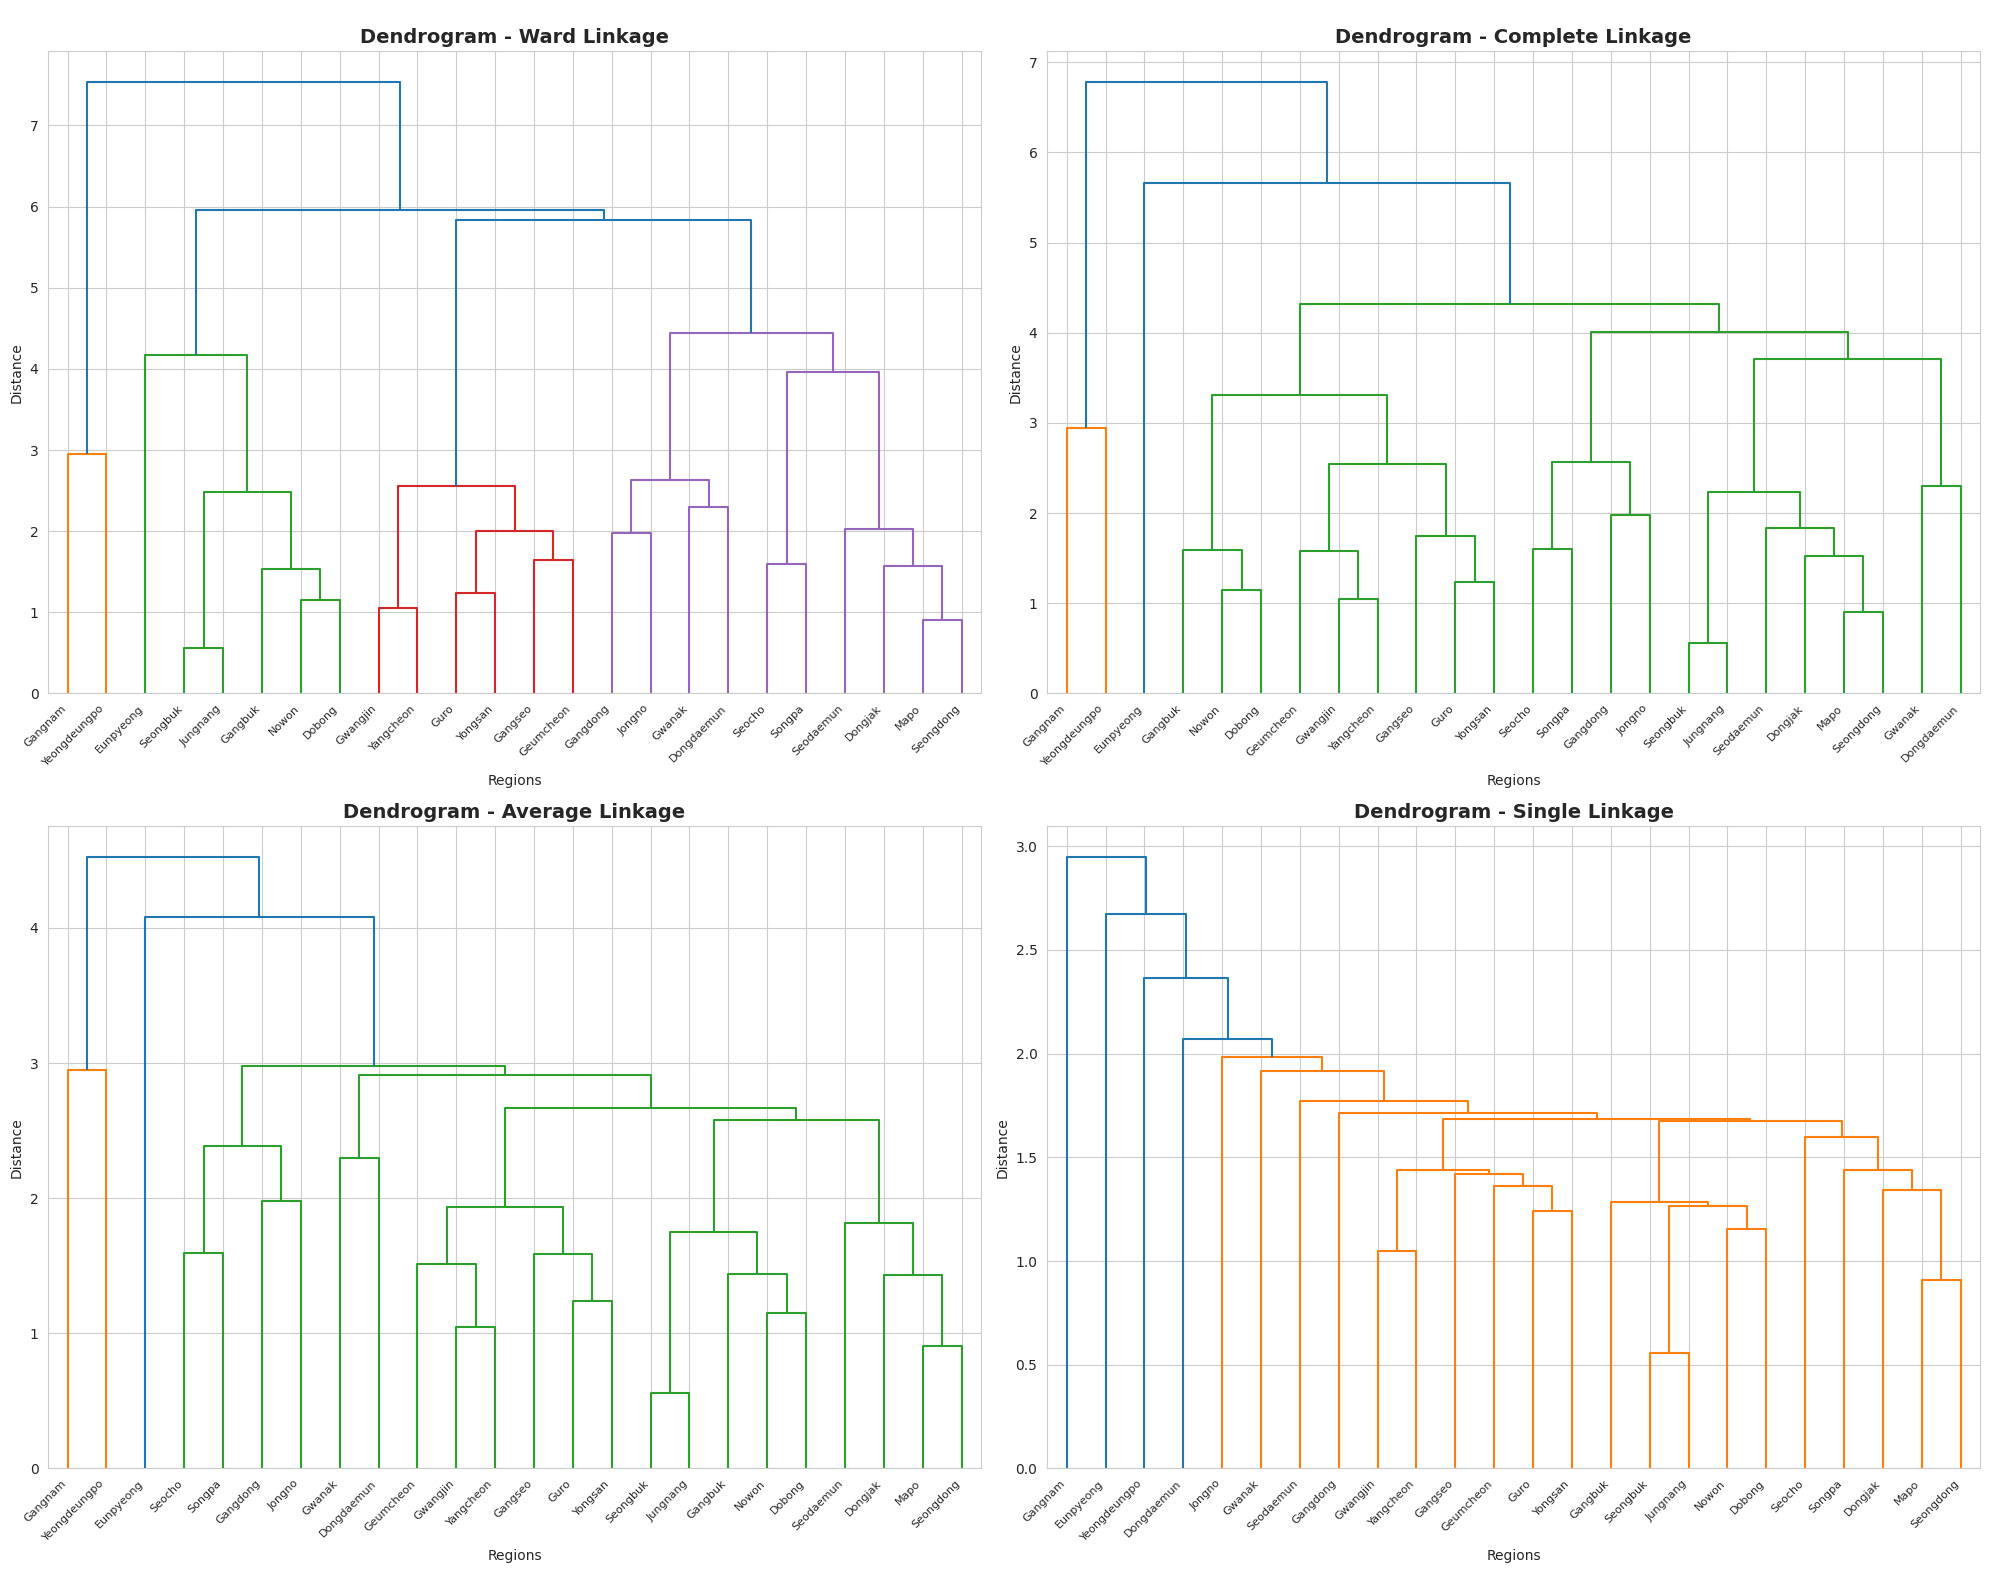

In [4]:
# 4. 데이터 표준화
print("\n=== 데이터 표준화 ===")
scaler_standard = StandardScaler()
X_scaled = scaler_standard.fit_transform(X)

print("표준화 완료!")
print(f"표준화된 데이터 형태: {X_scaled.shape}")

"""**5. 계층적 클러스터링 진행**"""

# 5. 계층적 클러스터링 진행
print("\n=== 계층적 클러스터링 진행 ===")

# 거리 행렬 계산 (유클리드 거리 사용)
distances = pdist(X_scaled, metric='euclidean')

# 연결 방법별로 클러스터링 진행
linkage_methods = ['ward', 'complete', 'average', 'single']
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

dendrograms = {}

for i, method in enumerate(linkage_methods):
    # 연결 행렬 계산
    Z = linkage(distances, method=method)
    dendrograms[method] = Z

    # 덴드로그램 그리기
    plt.subplot(2, 2, i+1)
    dendrogram(Z, labels=region_names, orientation='top', leaf_rotation=90)
    plt.title(f'Dendrogram - {method.capitalize()} Linkage', fontsize=14, fontweight='bold')
    plt.xlabel('Regions')
    plt.ylabel('Distance')
    plt.xticks(rotation=45, ha='right', fontsize=8)

plt.suptitle(' ', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()


=== 최적 클러스터 수 결정 ===
클러스터 수 2: 실루엣 점수 = 0.367, WCSS = 91.60
클러스터 수 3: 실루엣 점수 = 0.167, WCSS = 73.82
클러스터 수 4: 실루엣 점수 = 0.214, WCSS = 56.84
클러스터 수 5: 실루엣 점수 = 0.235, WCSS = 46.96
클러스터 수 6: 실루엣 점수 = 0.240, WCSS = 38.27
클러스터 수 7: 실루엣 점수 = 0.254, WCSS = 30.44


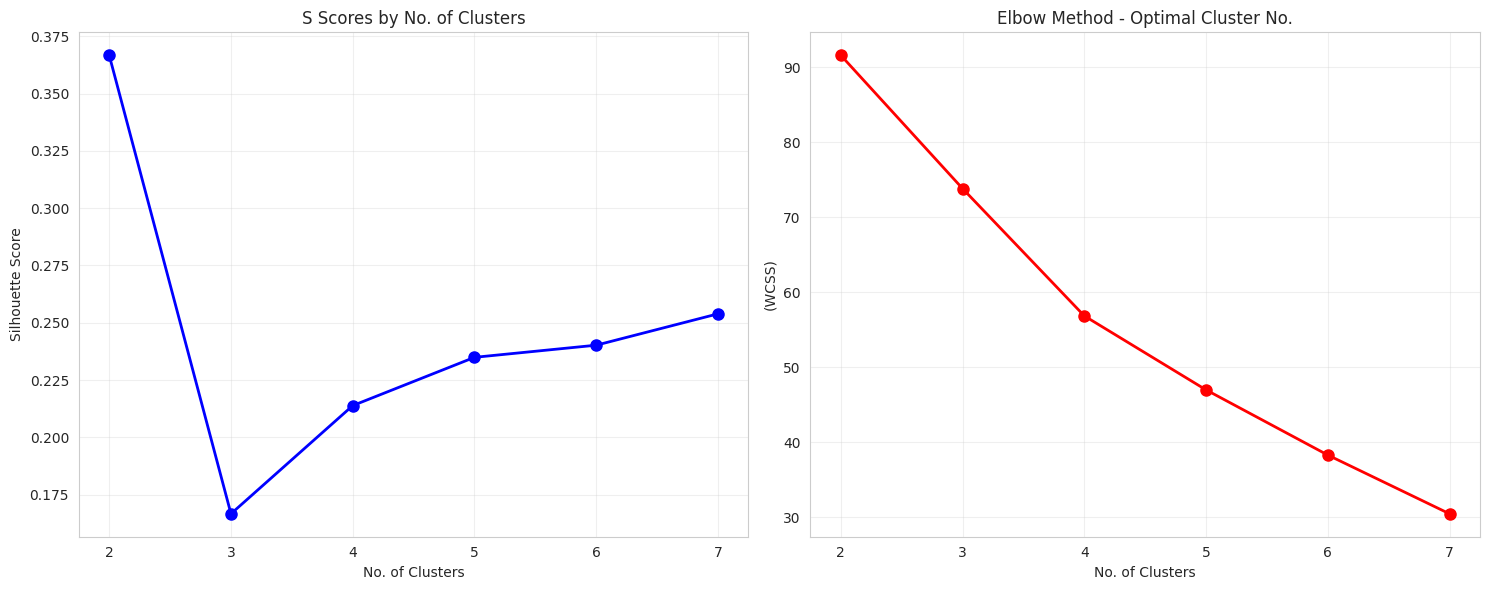

In [5]:
"""**6. 최적 클러스터 수 결정**"""

# 6. 최적 클러스터 수 결정 (Ward 방법 사용)
print("\n=== 최적 클러스터 수 결정 ===")

# Ward 방법의 연결 행렬 사용
Z_ward = dendrograms['ward']

# 여러 클러스터 수에 대해 실루엣 점수 계산
cluster_range = range(2, min(8, len(region_names)))
silhouette_scores = []
inertias = []

for n_clusters in cluster_range:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # 클러스터 내 분산 계산 (WCSS)
    wcss = 0
    for i in range(n_clusters):
        cluster_points = X_scaled[cluster_labels == i]
        if len(cluster_points) > 0:
            cluster_center = np.mean(cluster_points, axis=0)
            wcss += np.sum((cluster_points - cluster_center) ** 2)
    inertias.append(wcss)

    print(f"클러스터 수 {n_clusters}: 실루엣 점수 = {silhouette_avg:.3f}, WCSS = {wcss:.2f}")

# 실루엣 점수와 엘보우 방법 그래프
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 실루엣 점수 그래프
ax1.plot(cluster_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('No. of Clusters')
ax1.set_ylabel('Silhouette Score')
ax1.set_title('S Scores by No. of Clusters')
ax1.grid(True, alpha=0.3)

# 엘보우 방법 그래프
ax2.plot(cluster_range, inertias, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('No. of Clusters')
ax2.set_ylabel('(WCSS)')
ax2.set_title('Elbow Method - Optimal Cluster No.')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [6]:
# 최적 클러스터 수 선택
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]

# (option) Cluster 개수 매뉴얼 설정
# optimal_clusters = 3

print(f"\n📊 최적 클러스터 수: {optimal_clusters} (실루엣 점수: {max(silhouette_scores):.3f})")

"""**7. 최종 클러스터링 수행**"""

# 7. 최종 클러스터링 수행
print("\n=== 최종 클러스터링 수행 ===")

# 최적 클러스터 수로 클러스터링 수행
final_clusterer = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
final_labels = final_clusterer.fit_predict(X_scaled)

# 클러스터링 결과 데이터프레임에 추가
df_result = df.copy()
df_result['Cluster'] = final_labels

print(f"✅ 클러스터링 완료! 총 {optimal_clusters}개 클러스터로 분류")

# 각 클러스터별 지역 확인
print("\n=== 클러스터별 지역 분류 ===")
for i in range(optimal_clusters):
    cluster_regions = df_result[df_result['Cluster'] == i][region_col].values
    print(f"🏷️  클러스터 {i+1}: {list(cluster_regions)} ({len(cluster_regions)}개 지역)")


📊 최적 클러스터 수: 2 (실루엣 점수: 0.367)

=== 최종 클러스터링 수행 ===
✅ 클러스터링 완료! 총 2개 클러스터로 분류

=== 클러스터별 지역 분류 ===
🏷️  클러스터 1: ['Gangdong', 'Gangbuk', 'Gangseo', 'Gwanak', 'Gwangjin', 'Guro', 'Geumcheon', 'Nowon', 'Dobong', 'Dongdaemun', 'Dongjak', 'Mapo', 'Seodaemun', 'Seocho', 'Seongdong', 'Seongbuk', 'Songpa', 'Yangcheon', 'Yongsan', 'Eunpyeong', 'Jongno', 'Jungnang'] (22개 지역)
🏷️  클러스터 2: ['Gangnam', 'Yeongdeungpo'] (2개 지역)



=== PCA를 통한 클러스터링 결과 시각화 ===
PC1 설명 분산 비율: 0.429 (42.9%)
PC2 설명 분산 비율: 0.216 (21.6%)
총 설명 분산 비율: 0.644 (64.4%)


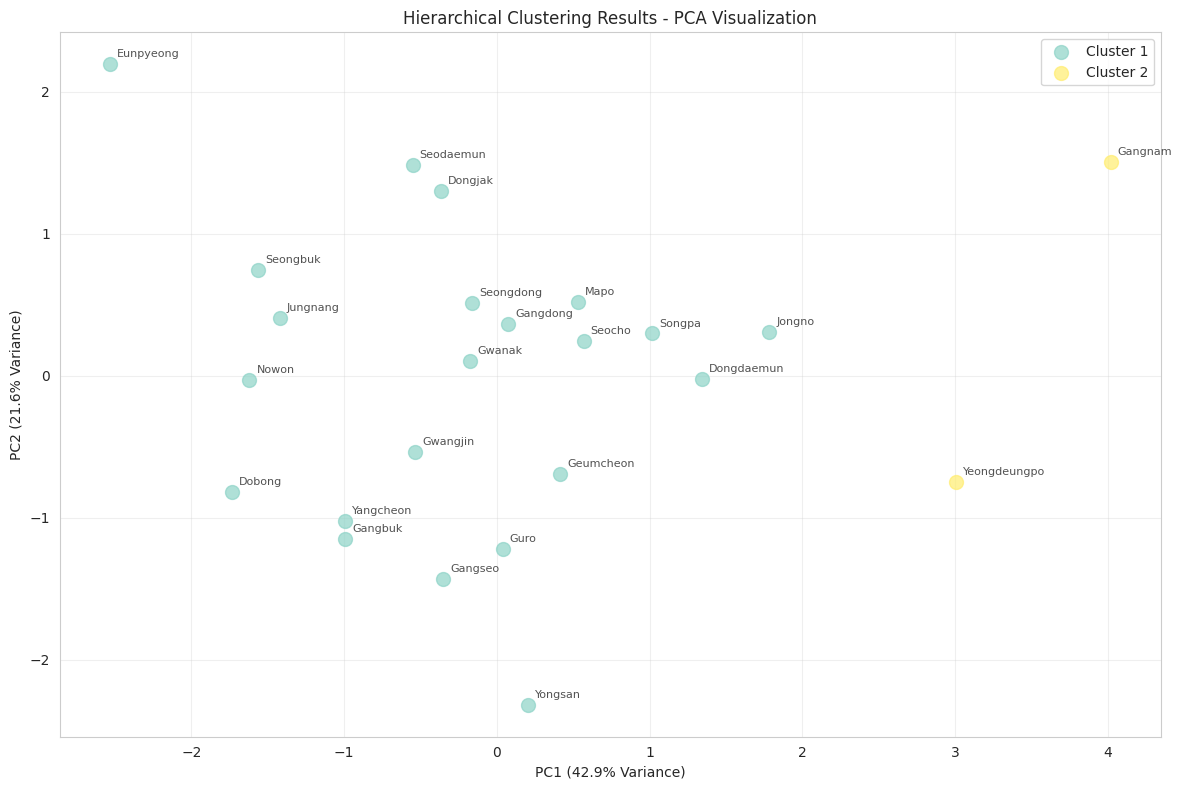

In [7]:
"""**8. PCA를 통한 시각화**"""

# 8. PCA를 통한 2D 시각화
print("\n=== PCA를 통한 클러스터링 결과 시각화 ===")

# PCA로 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA 설명 분산 비율
explained_variance = pca.explained_variance_ratio_
print(f"PC1 설명 분산 비율: {explained_variance[0]:.3f} ({explained_variance[0]*100:.1f}%)")
print(f"PC2 설명 분산 비율: {explained_variance[1]:.3f} ({explained_variance[1]*100:.1f}%)")
print(f"총 설명 분산 비율: {sum(explained_variance):.3f} ({sum(explained_variance)*100:.1f}%)")

# 클러스터별 시각화
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(np.linspace(0, 1, optimal_clusters))

for i in range(optimal_clusters):
    cluster_mask = final_labels == i
    plt.scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1],
               c=[colors[i]], label=f'Cluster {i+1}', s=100, alpha=0.7)

    # 지역명 표시
    for j, region in enumerate(region_names[cluster_mask]):
        plt.annotate(region, (X_pca[cluster_mask, 0][j], X_pca[cluster_mask, 1][j]),
                    xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}% Variance)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}% Variance)')
plt.title('Hierarchical Clustering Results - PCA Visualization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


=== 클러스터별 특성 분석 ===


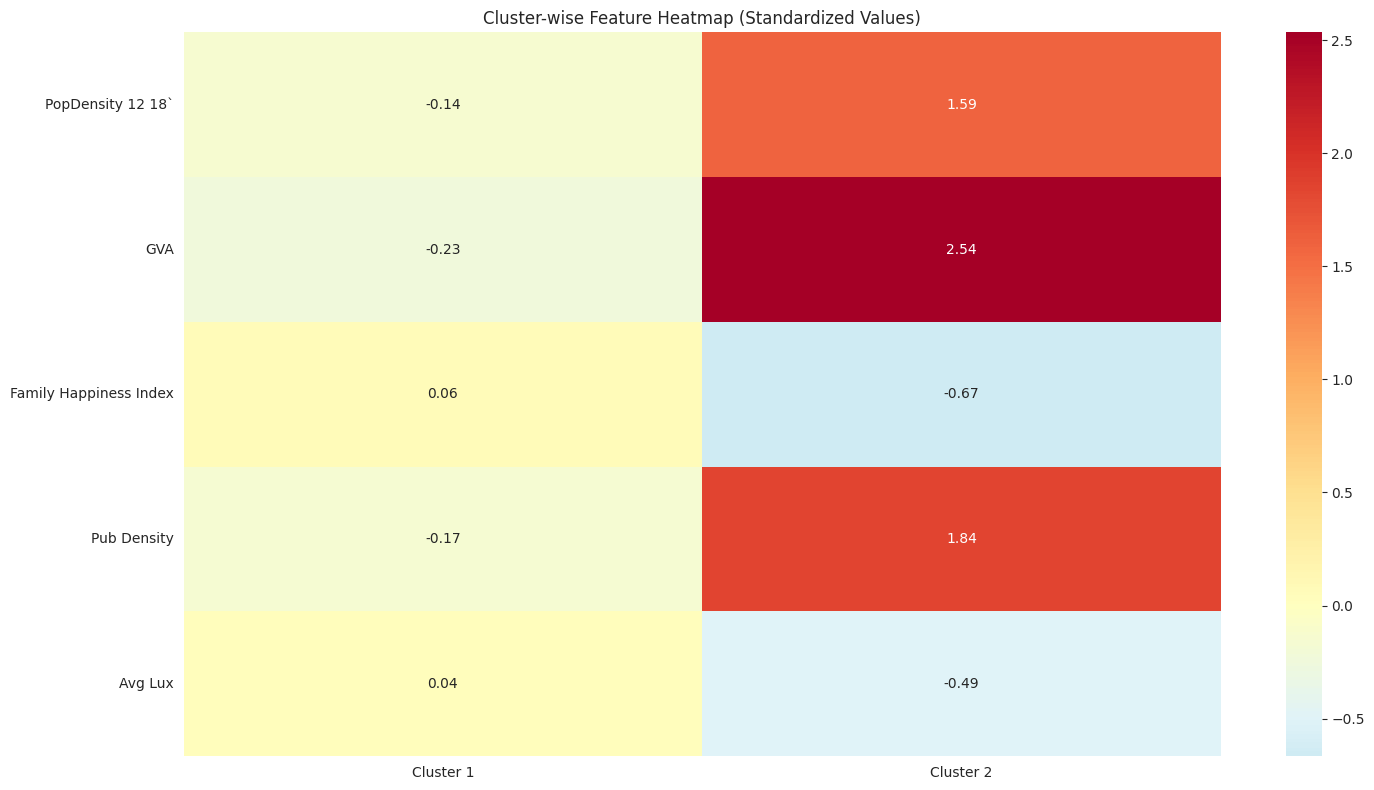


=== 클러스터별 원본 데이터 평균값 ===
         PopDensity_12_18`          GVA  Family_Happiness_Index  Pub_Density  \
Cluster                                                                        
0                  5139.96  11960862.86                    6.89         5.97   
1                  7661.76  54343646.50                    6.66        16.85   

         Avg_Lux  
Cluster           
0        4987.91  
1        4471.80  


In [8]:
"""**9. 클러스터 특성 분석**"""

# 9. 클러스터별 특성 분석
print("\n=== 클러스터별 특성 분석 ===")

# 각 클러스터의 중심값 계산
cluster_centers = []
for i in range(optimal_clusters):
    cluster_mask = final_labels == i
    cluster_center = np.mean(X_scaled[cluster_mask], axis=0)
    cluster_centers.append(cluster_center)

cluster_centers = np.array(cluster_centers)

# 클러스터별 특성 히트맵
plt.figure(figsize=(15, 8))
sns.heatmap(cluster_centers.T,
           xticklabels=[f'Cluster {i+1}' for i in range(optimal_clusters)],
           yticklabels=[col.replace('_', ' ') for col in feature_cols],  # 컬럼명 가독성 향상
           annot=True, fmt='.2f', cmap='RdYlBu_r', center=0)
plt.title('Cluster-wise Feature Heatmap (Standardized Values)')
plt.tight_layout()
plt.show()

# 원본 데이터로 클러스터별 평균값 계산
print("\n=== 클러스터별 원본 데이터 평균값 ===")
cluster_stats = df_result.groupby('Cluster')[feature_cols].mean()
print(cluster_stats.round(2))


=== 실루엣 분석 ===
평균 실루엣 점수: 0.367


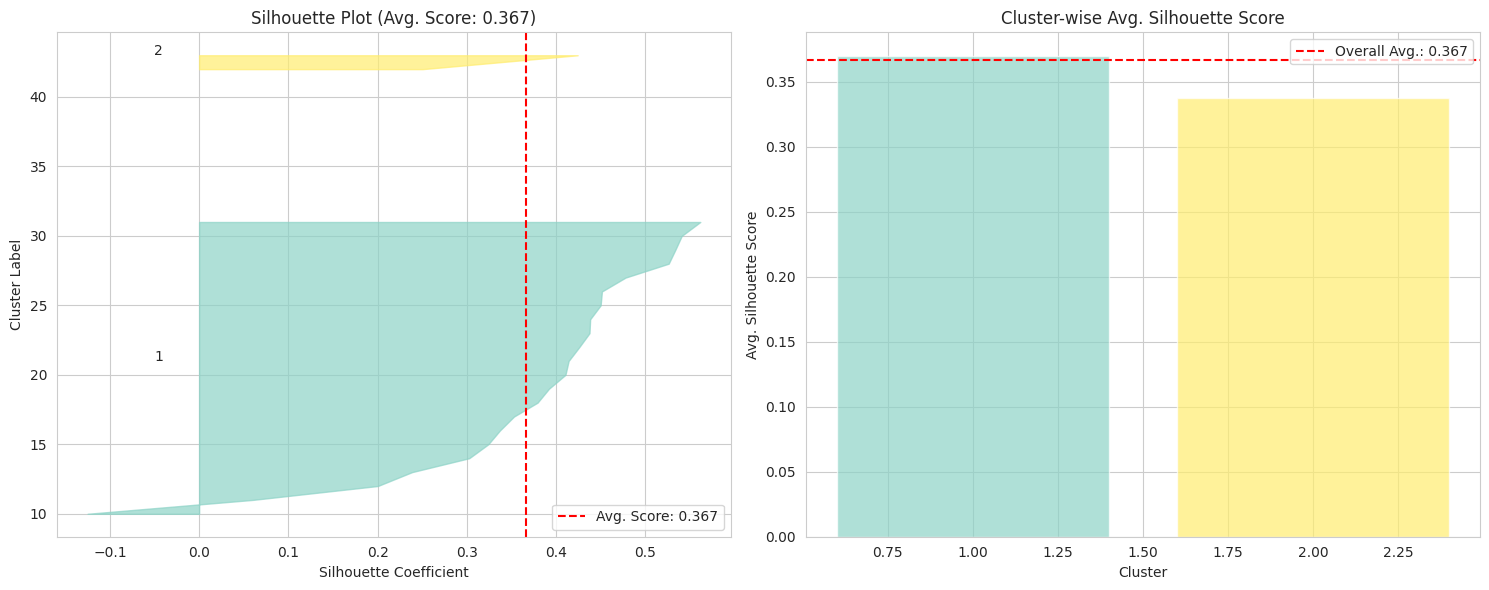

In [9]:
# 10. 실루엣 분석
print("\n=== 실루엣 분석 ===")

# 실루엣 점수 계산
silhouette_avg = silhouette_score(X_scaled, final_labels)
sample_silhouette_values = silhouette_samples(X_scaled, final_labels)

print(f"평균 실루엣 점수: {silhouette_avg:.3f}")

# 실루엣 플롯
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 실루엣 플롯
y_lower = 10
colors = plt.cm.Set3(np.linspace(0, 1, optimal_clusters))

for i in range(optimal_clusters):
    cluster_silhouette_values = sample_silhouette_values[final_labels == i]
    cluster_silhouette_values.sort()

    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                     0, cluster_silhouette_values,
                     facecolor=colors[i], edgecolor=colors[i], alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
    y_lower = y_upper + 10

ax1.set_xlabel('Silhouette Coefficient')
ax1.set_ylabel('Cluster Label')
ax1.set_title(f'Silhouette Plot (Avg. Score: {silhouette_avg:.3f})')

# 평균 실루엣 점수 표시
ax1.axvline(x=silhouette_avg, color="red", linestyle="--",
           label=f'Avg. Score: {silhouette_avg:.3f}')
ax1.legend()

# 클러스터별 실루엣 점수 분포
cluster_silhouette_scores = []
for i in range(optimal_clusters):
    cluster_scores = sample_silhouette_values[final_labels == i]
    cluster_silhouette_scores.append(cluster_scores.mean())

ax2.bar(range(1, optimal_clusters+1), cluster_silhouette_scores,
        color=colors, alpha=0.7)
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Avg. Silhouette Score')
ax2.set_title('Cluster-wise Avg. Silhouette Score')
ax2.axhline(y=silhouette_avg, color="red", linestyle="--",
           label=f'Overall Avg.: {silhouette_avg:.3f}')
ax2.legend()

plt.tight_layout()
plt.show()

In [10]:
# 요약 정보 출력
print("\n" + "="*50)
print("🎯 계층적 클러스터링 분석 완료!")
print("="*50)
print(f"📊 총 분석 지역 수: {len(region_names)}")
print(f"🎯 최적 클러스터 수: {optimal_clusters}")
print(f"📈 평균 실루엣 점수: {silhouette_avg:.3f}")
print(f"🔍 PCA 설명 분산 비율: {sum(explained_variance)*100:.1f}%")

print("\n📋 클러스터별 요약:")
for i in range(optimal_clusters):
    cluster_regions = df_result[df_result['Cluster'] == i][region_col].values
    cluster_silhouette = cluster_silhouette_scores[i]
    print(f"   클러스터 {i+1}: {len(cluster_regions)}개 지역 (실루엣: {cluster_silhouette:.3f})")
    print(f"      → {', '.join(cluster_regions)}")

print("\n✅ 모든 분석이 완료되었습니다!")
print("="*50)


🎯 계층적 클러스터링 분석 완료!
📊 총 분석 지역 수: 24
🎯 최적 클러스터 수: 2
📈 평균 실루엣 점수: 0.367
🔍 PCA 설명 분산 비율: 64.4%

📋 클러스터별 요약:
   클러스터 1: 22개 지역 (실루엣: 0.369)
      → Gangdong, Gangbuk, Gangseo, Gwanak, Gwangjin, Guro, Geumcheon, Nowon, Dobong, Dongdaemun, Dongjak, Mapo, Seodaemun, Seocho, Seongdong, Seongbuk, Songpa, Yangcheon, Yongsan, Eunpyeong, Jongno, Jungnang
   클러스터 2: 2개 지역 (실루엣: 0.337)
      → Gangnam, Yeongdeungpo

✅ 모든 분석이 완료되었습니다!
